<a href="https://colab.research.google.com/github/angelosou/biblioteca_pandas/blob/main/Desafio_Crie_um_modelo_de_an%C3%A1lise_das_m%C3%A9tricas_RFV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Descrição estatística dos dados numéricos:
            Quantity                    InvoiceDate      UnitPrice
count  541909.000000                         541909  541909.000000
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114
min    -80995.000000            2010-12-01 08:26:00  -11062.060000
25%         1.000000            2011-03-28 11:34:00       1.250000
50%         3.000000            2011-07-19 17:17:00       2.080000
75%        10.000000            2011-10-19 11:27:00       4.130000
max     80995.000000            2011-12-09 12:50:00   38970.000000
std       218.081158                            NaN      96.759853

Descrição estatística dos dados categóricos:
        CustomerID
count     406829.0
unique      4372.0
top        17841.0
freq        7983.0


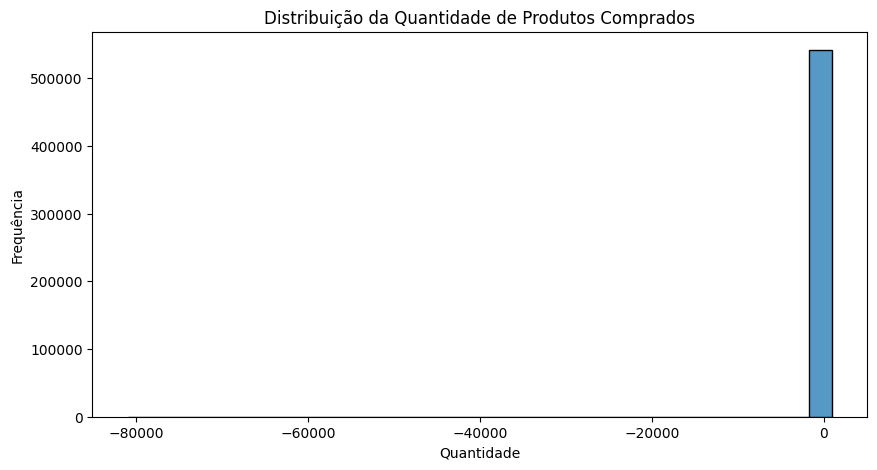

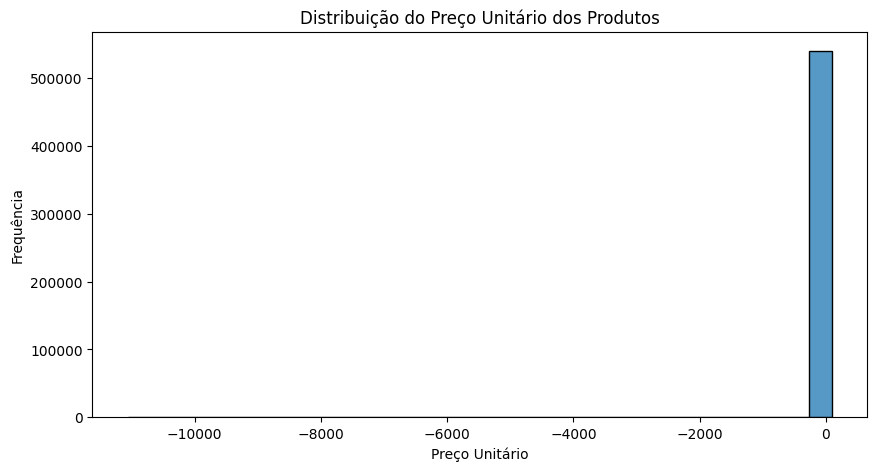


Dados nulos por coluna:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Quantidade de dados duplicados:
5268


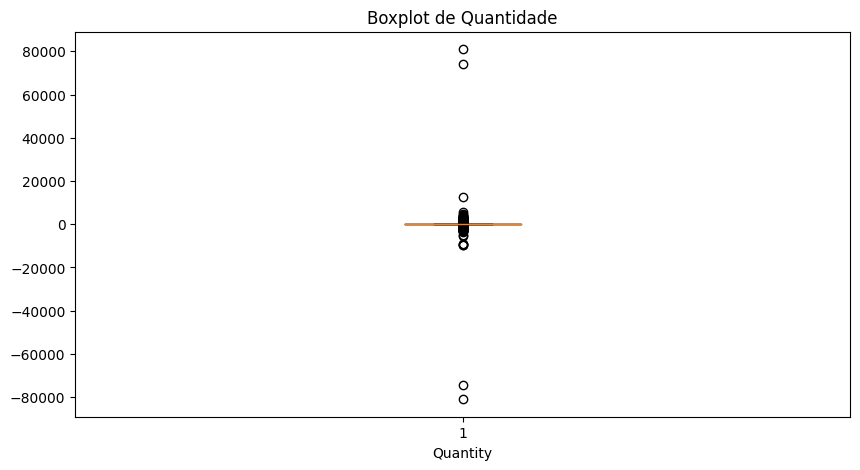

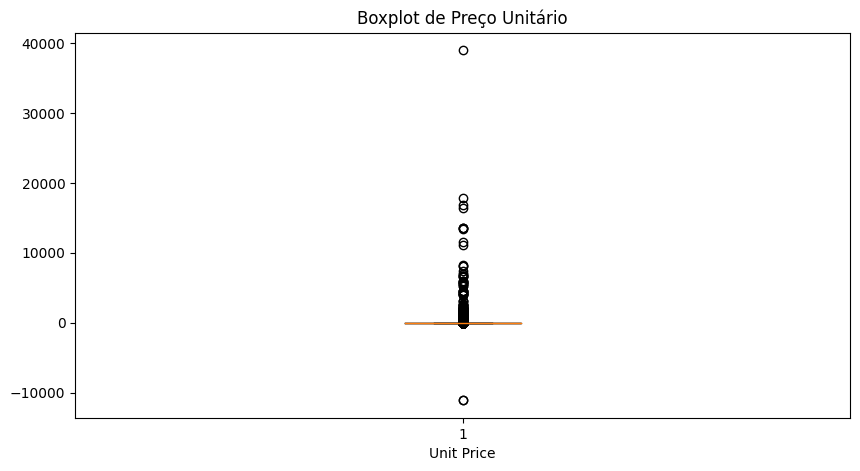

In [ ]:
#Etapa 01) Análise exploratória dos dados
# Importação das bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# Carregamento e Preparação dos Dados
# -------------------------------

# Carregar a base de dados a partir do arquivo CSV
data = pd.read_csv('/content/data.csv', encoding='ISO-8859-1')

# Converter a coluna 'InvoiceDate' para datetime para facilitar a manipulação de datas
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Converter a coluna 'CustomerID' para tipo categórico, já que é um identificador
data['CustomerID'] = data['CustomerID'].astype('category')

# -------------------------------
# Descrição Estatística dos Dados
# -------------------------------

# Exibir estatísticas descritivas para dados numéricos
print("Descrição estatística dos dados numéricos:")
print(data.describe())

# Exibir estatísticas descritivas para dados categóricos
print("\nDescrição estatística dos dados categóricos:")
print(data.describe(include=['category']))

# -------------------------------
# Visualização das Distribuições
# -------------------------------

# Histograma para a distribuição de 'Quantity'
plt.figure(figsize=(10, 5))
sns.histplot(data[data['Quantity'] <= 1000]['Quantity'], bins=30, kde=False)
plt.title('Distribuição da Quantidade de Produtos Comprados')
plt.xlabel('Quantidade')
plt.ylabel('Frequência')
plt.show()

# Histograma para a distribuição de 'UnitPrice'
plt.figure(figsize=(10, 5))
sns.histplot(data[data['UnitPrice'] < 100]['UnitPrice'], bins=30, kde=False)
plt.title('Distribuição do Preço Unitário dos Produtos')
plt.xlabel('Preço Unitário')
plt.ylabel('Frequência')
plt.show()

# -------------------------------
# Verificação de Dados Nulos e Duplicados
# -------------------------------

# Verificar e imprimir a quantidade de dados nulos por coluna
print("\nDados nulos por coluna:")
print(data.isnull().sum())

# Verificar e imprimir a quantidade de dados duplicados no dataset
print("\nQuantidade de dados duplicados:")
print(data.duplicated().sum())

# -------------------------------
# Visualização de Outliers
# -------------------------------

# Limpeza de dados para 'Quantity' antes de visualizar com boxplot
data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')
clean_quantity = data['Quantity'].dropna()
clean_quantity = clean_quantity[clean_quantity.apply(lambda x: x != float('inf') and x != float('-inf'))]

# Boxplot para 'Quantity'
plt.figure(figsize=(10, 5))
plt.boxplot(clean_quantity)
plt.title('Boxplot de Quantidade')
plt.xlabel('Quantity')
plt.show()

# Limpeza de dados para 'UnitPrice' antes de visualizar com boxplot
clean_unit_price = data['UnitPrice'].dropna()
clean_unit_price = clean_unit_price[clean_unit_price.apply(lambda x: x != float('inf') and x != float('-inf'))]

# Boxplot para 'UnitPrice'
plt.figure(figsize=(10, 5))
plt.boxplot(clean_unit_price)
plt.title('Boxplot de Preço Unitário')
plt.xlabel('Unit Price')
plt.show()


In [ ]:
#Etapa 02) Pré-processamento dos dados
# Importação das bibliotecas necessárias
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
data = pd.read_csv('/content/data.csv', encoding='ISO-8859-1')

# Converter a coluna 'InvoiceDate' para datetime e 'CustomerID' para categoria
# Facilita a manipulação de datas e melhora a performance em operações de filtragem e agrupamento.
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['CustomerID'] = data['CustomerID'].astype('category')

# Remover dados duplicados
# Dados duplicados podem levar a análises distorcidas e afetar a performance do modelo.
data.drop_duplicates(inplace=True)

# Remover dados nulos
# Dados nulos podem introduzir viés e erros em análises subsequentes.
data.dropna(inplace=True)

# Identificar e remover outliers para 'Quantity' e 'UnitPrice'
# Outliers podem distorcer resultados significativamente, afetando análises e modelos.
Q1 = data['Quantity'].quantile(0.25)
Q3 = data['Quantity'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['Quantity'] >= (Q1 - 1.5 * IQR)) & (data['Quantity'] <= (Q3 + 1.5 * IQR))]

Q1 = data['UnitPrice'].quantile(0.25)
Q3 = data['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['UnitPrice'] >= (Q1 - 1.5 * IQR)) & (data['UnitPrice'] <= (Q3 + 1.5 * IQR))]

# Seleção de variáveis
# 'Quantity' e 'UnitPrice' são escolhidos com base em sua relevância para o comportamento de compra dos clientes.
data = data[['CustomerID', 'Quantity', 'UnitPrice']]

# Normalização dos dados
# Normalizar para garantir que todas as variáveis contribuam igualmente para o modelo.
scaler = StandardScaler()
data.loc[:, ['Quantity', 'UnitPrice']] = scaler.fit_transform(data[['Quantity', 'UnitPrice']])

# Exibir os dados pré-processados
print(data.head())


  CustomerID  Quantity  UnitPrice
0    17850.0 -0.195929   0.223622
1    17850.0 -0.195929   0.765671
2    17850.0  0.094332   0.352681
3    17850.0 -0.195929   0.765671
4    17850.0 -0.195929   0.765671


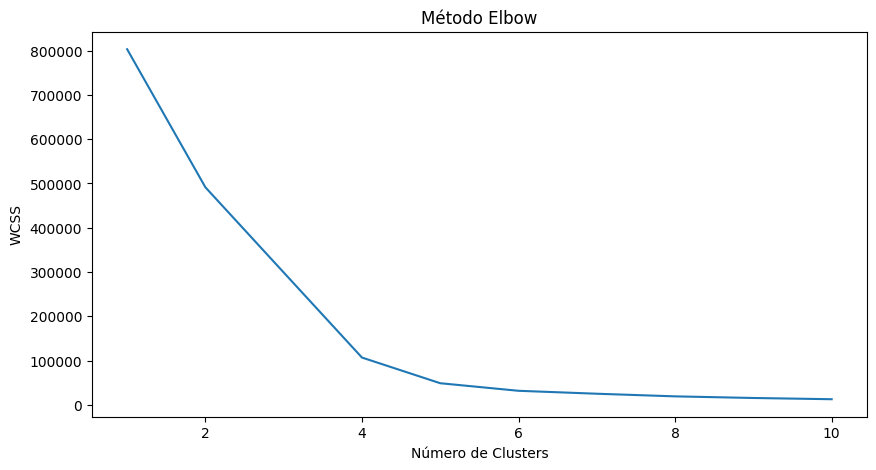

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  Cluster  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom        0  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom        0  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom        0  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom        0  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom        0  


<ipython-input-88-1b1fa5632965>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_data['Cluster'] = cluster_labels


In [ ]:
#Etapa 03) Selecione um algoritmo de clusterização
# Importação das bibliotecas necessárias
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Carregar e preparar os dados (etapas já realizadas anteriormente)
data = pd.read_csv('/content/data.csv', encoding='ISO-8859-1')
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['CustomerID'] = data['CustomerID'].astype('category')
data = data[['Quantity', 'UnitPrice']]
scaler = StandardScaler()
data = scaler.fit_transform(data)

# b. Método Elbow para determinar o número ideal de clusters
wcss = []
for i in range(1, 11):  # Testando de 1 a 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plotando o resultado do Método Elbow
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Método Elbow')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

# c. Implementação do K-means com o número ideal de clusters
# Supondo que o "cotovelo" esteja em 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(data)

# Adicionar rótulos de cluster de volta ao DataFrame original (para análise posterior)
original_data = pd.read_csv('/content/data.csv', encoding='ISO-8859-1')
original_data = original_data.iloc[:len(cluster_labels), :]  # Garantir mesmo tamanho
original_data['Cluster'] = cluster_labels

# Exibir algumas linhas com os rótulos de cluster
print(original_data.head())


<ipython-input-107-cb3d8f4105be>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


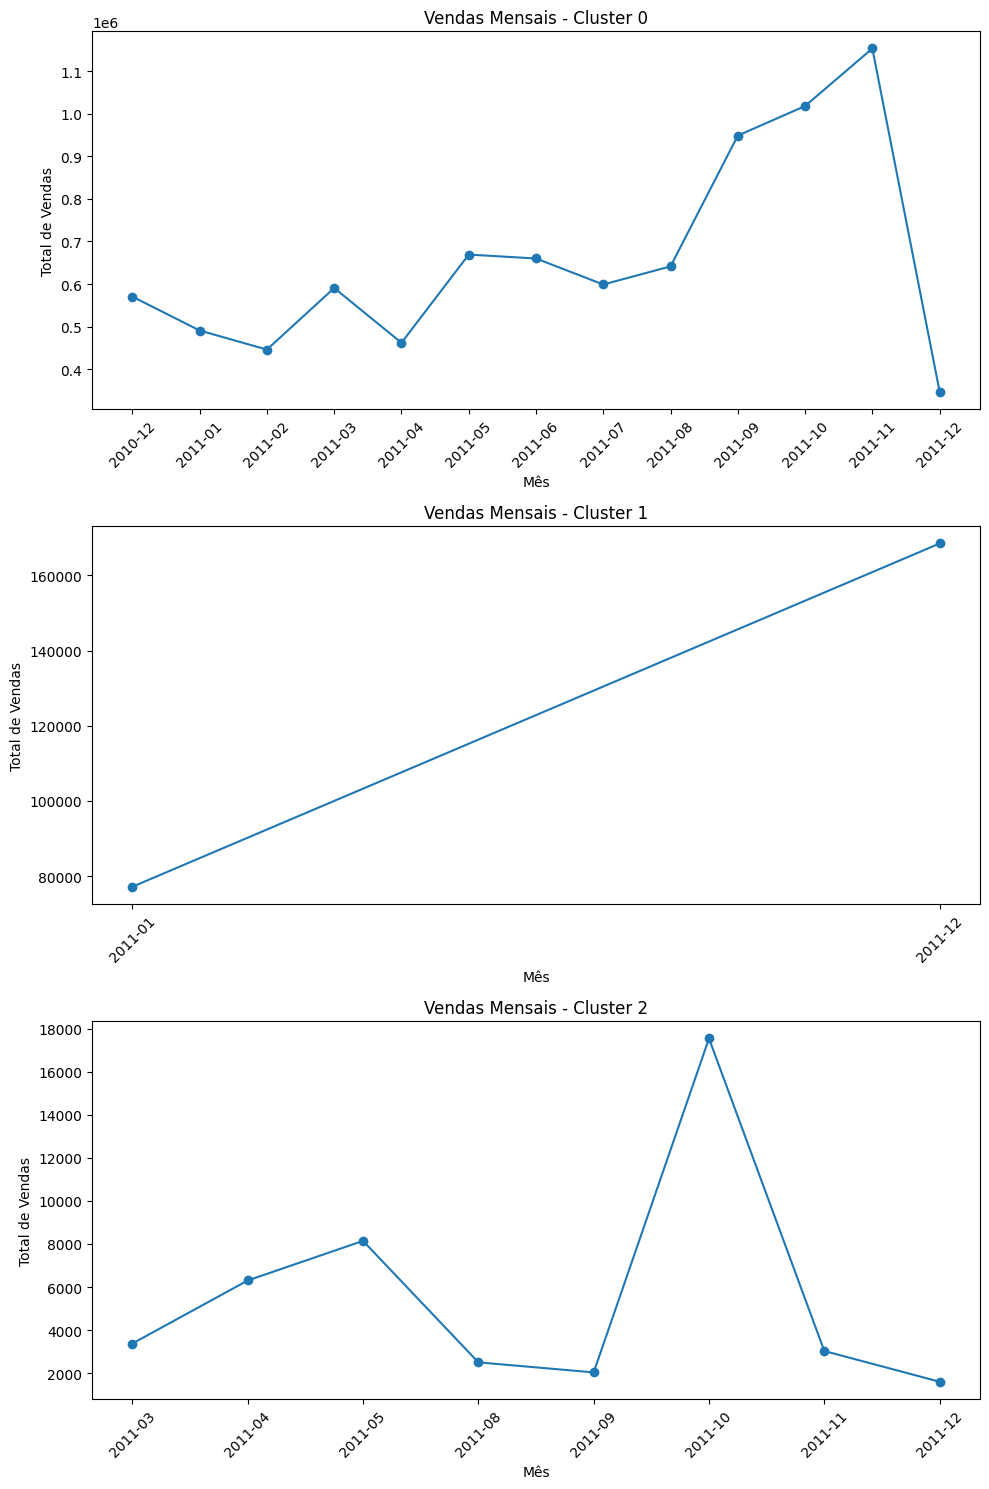

In [ ]:
#Etapa 04) Analise os clusters obtidos
# Importação das bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# ================================
# Preparação e Limpeza dos Dados
# ================================

# Carregamento dos dados do arquivo CSV
data = pd.read_csv('/content/data.csv', encoding='ISO-8859-1')

# Remoção de registros duplicados para garantir a integridade da análise
data.drop_duplicates(inplace=True)

# Remoção de registros onde o ID do cliente está ausente, pois são essenciais para a análise de cluster
data.dropna(subset=['CustomerID'], inplace=True)

# Remoção de registros com quantidades negativas ou preços unitários negativos, pois podem representar devoluções ou erros
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

# Cálculo do preço total por transação
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# Conversão da coluna 'InvoiceDate' para o tipo datetime para facilitar a manipulação de datas
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# =====================================
# Seleção e Escalonamento de Características
# =====================================

# Seleção das características para o processo de clusterização
features = data[['Quantity', 'UnitPrice']]

# Escalonamento das características para garantir que a magnitude não afete os algoritmos
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# =================================
# Aplicação do K-means para Clusterização
# =================================

# Configuração e aplicação do K-means com três clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
data['Cluster'] = kmeans.fit_predict(features_scaled)

# =================================
# Preparação para Análise Temporal
# =================================

# Extração do mês da data da fatura para análise temporal
data['Month'] = data['InvoiceDate'].dt.to_period('M')

# Agrupamento dos dados por cluster e mês, e cálculo da soma das vendas totais
monthly_sales = data.groupby(['Cluster', 'Month']).agg(TotalSales=('TotalPrice', 'sum')).reset_index()

# =================================
# Visualização das Vendas por Cluster
# =================================

# Criação de gráficos de linha para visualizar as vendas mensais de cada cluster
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Iteração sobre cada subplot para criar um gráfico para cada cluster
for i, ax in enumerate(axes.flatten()):
    cluster_data = monthly_sales[monthly_sales['Cluster'] == i]
    ax.plot(cluster_data['Month'].astype(str), cluster_data['TotalSales'], marker='o', linestyle='-')
    ax.set_title(f'Vendas Mensais - Cluster {i}')
    ax.set_xlabel('Mês')
    ax.set_ylabel('Total de Vendas')
    ax.tick_params(axis='x', rotation=45)

# Ajuste automático do layout para evitar sobreposição de elementos
plt.tight_layout()
plt.show()


<ipython-input-118-54aa4d13b3cf>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


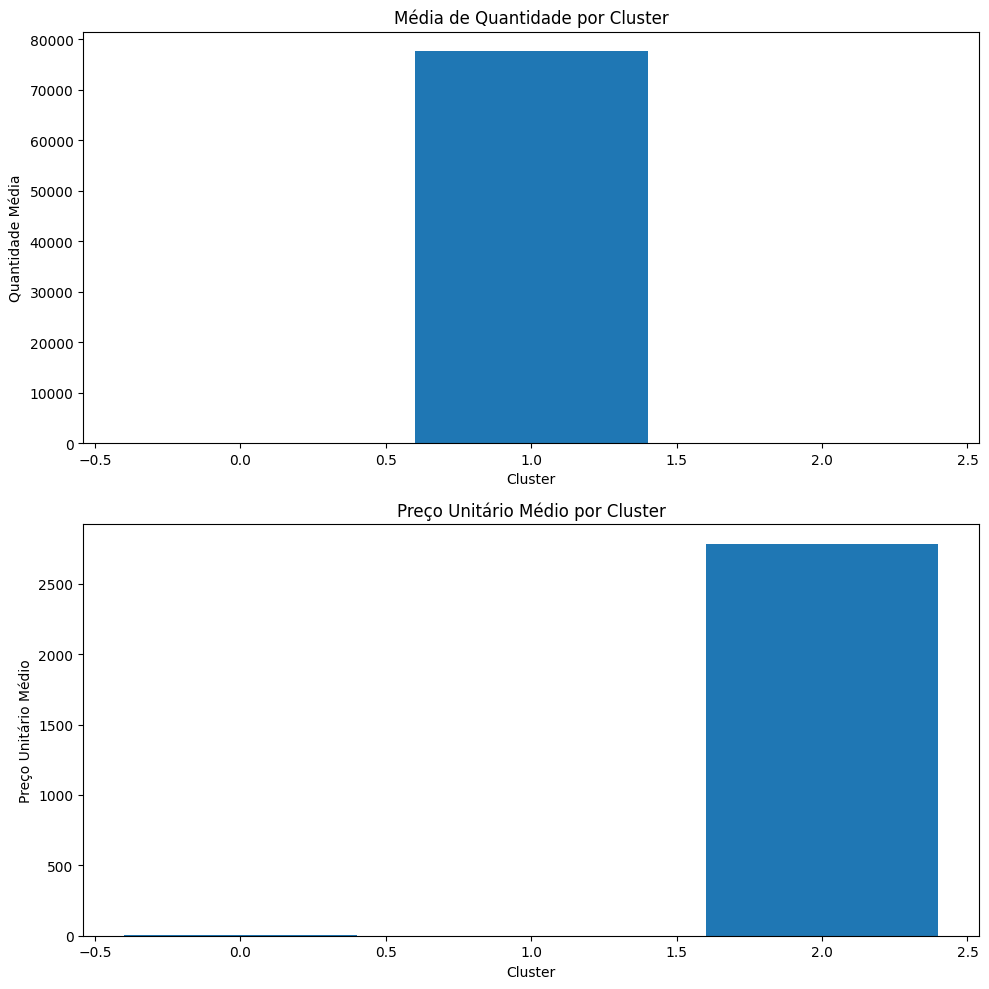

In [ ]:
#Etapa 05) Interpretação dos resultados obtidos
# Importação das bibliotecas necessárias
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# ================================
# Carregamento e Limpeza dos Dados
# ================================
# Carregar os dados do arquivo CSV
data = pd.read_csv('/content/data.csv', encoding='ISO-8859-1')

# Remover registros duplicados para garantir a precisão na análise
data.drop_duplicates(inplace=True)

# Remover registros com valores nulos na coluna 'CustomerID', essencial para a análise de clusters
data.dropna(subset=['CustomerID'], inplace=True)

# Filtrar dados para remover quantidades negativas ou preços unitários negativos,
# que podem indicar devoluções ou erros de dados
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

# Adicionar uma nova coluna 'TotalPrice' que representa o gasto total em cada transação
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# Converter a coluna 'InvoiceDate' de string para datetime para facilitar a manipulação de datas
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# =================================
# Preparação para Clustering
# =================================
# Seleção das características 'Quantity' e 'UnitPrice' para usar na análise de clusters
features = data[['Quantity', 'UnitPrice']]

# Normalização das características para garantir que a escala não distorça os resultados do algoritmo de clustering
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Aplicação do algoritmo K-means para identificar clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
data['Cluster'] = kmeans.fit_predict(features_scaled)

# =================================
# Análise Descritiva dos Clusters
# =================================
# Agrupar dados por cluster e calcular médias e soma para análises quantitativas
cluster_profile = data.groupby('Cluster').agg({
    'Quantity': 'mean',
    'UnitPrice': 'mean',
    'TotalPrice': 'sum'
}).reset_index()

# =================================
# Visualização dos Resultados
# =================================
# Configurar a área de plotagem
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Plotar a média de quantidades por cluster
ax[0].bar(cluster_profile['Cluster'], cluster_profile['Quantity'])
ax[0].set_title('Média de Quantidade por Cluster')
ax[0].set_xlabel('Cluster')
ax[0].set_ylabel('Quantidade Média')

# Plotar o preço unitário médio por cluster
ax[1].bar(cluster_profile['Cluster'], cluster_profile['UnitPrice'])
ax[1].set_title('Preço Unitário Médio por Cluster')
ax[1].set_xlabel('Cluster')
ax[1].set_ylabel('Preço Unitário Médio')

# Ajustar automaticamente o layout dos subplots para evitar sobreposições
plt.tight_layout()
plt.show()
